Importando bibliotecas e definindo parâmetros.

In [56]:
#Bibliotecas que serão utilizadas ao longo do exercício
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

#Parâmetros
l0 = 0.2 # (m)
m = 0.01122 # (kg)
ρ = 1 # (kg/m^3)
r = 0.007 # (m)
g = 9.80 # (m/s^2)
Cd = 0.47 # adimensional
A = pi * (r ** 2)
t_lista = np.arange(0, 10, 1e-3)
x_0 = -l0
y_0 = 0
vx_0 = 0
vy_0 = 0

Implementando a função 'pendulo'.

In [57]:
def pendulo(a, t):
    x = a[0]
    y = a[1]
    vx = a[2]
    vy = a[3]
    v = sqrt(vx ** 2 + vy ** 2)
    if v > 0:
        cos_alpha = vx/v
        sen_alpha = vy/v
    else:
        sen_alpha = 0
        cos_alpha = 0
    sen_theta = x/l0
    cos_theta = -y/l0
    Fa = ρ * A * Cd * (v ** 2) * 0.5
    T = m*v**2/l0 + m*g*cos_theta
    dxdt = vx
    dydt = vy
    dvxdt = (-T * sen_theta - Fa * cos_alpha) / m
    dvydt = ( T * cos_theta - Fa * sen_alpha) / m - g
    dadt = [dxdt, dydt, dvxdt, dvydt]
    return dadt

Implementando o gráfico da trajetória.

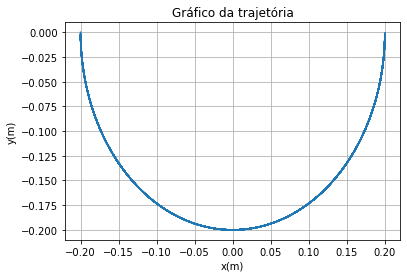

In [58]:
a_0 = [x_0, y_0, vx_0, vy_0]
a_lista = odeint(pendulo, a_0, t_lista)

plt.plot(a_lista[:,0], a_lista[:, 1])
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.title('Gráfico da trajetória')
plt.grid(True)
plt.show()

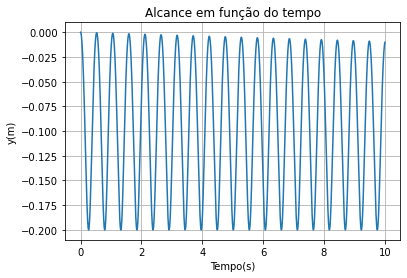

In [59]:
plt.plot(t_lista, a_lista[:, 1])
plt.xlabel('Tempo(s)')
plt.ylabel('y(m)')
plt.title('Alcance em função do tempo')
plt.grid(True)
plt.show()

Gráficos conclusivos.

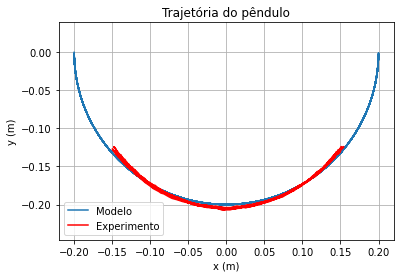

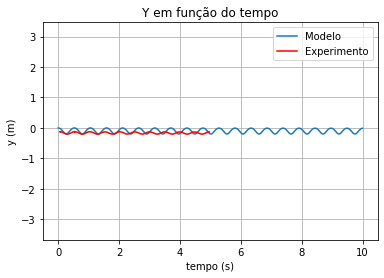

In [60]:
a_0 = [x_0, y_0, vx_0, vy_0]
a_lista = odeint(pendulo, a_0, t_lista)

x = a_lista[:,0]
y = a_lista[:,1]
vx = a_lista[:,2]
vy = a_lista[:,3]

import pandas

colunas = ['t', 'x', 'y', 'vx', 'vy']
dados = pandas.read_csv('experimento.csv', names =  colunas)

#dados do experimento
te = dados.t.tolist()
xe = dados.x.tolist()
ye = dados.y.tolist()
vxe = dados.vx.tolist()
vye = dados.vy.tolist()


plt.plot(x, y, label =  'Modelo')
plt.plot(xe, ye, 'r', label = "Experimento")
plt.title("Trajetória do pêndulo")
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis('equal')
plt.grid()
plt.show()

plt.plot(t_lista, y, label = 'Modelo')
plt.plot(te, ye, 'r', label = 'Experimento')
plt.xlabel('tempo (s)')
plt.ylabel('y (m)')
plt.legend()
plt.title('Y em função do tempo')
plt.grid(True)
plt.axis('equal')
plt.show()

pares_exp = []
for i in range(len(te)):
    pares_exp.append([xe[i], ye[i]])
    
pares = []
for i in range(len(x)):
    pares.append(['{0:.3f}, {1:.3f}'.format(x[i], y[i])])
    
    
# print (pares_exp)
    
# print(pares)

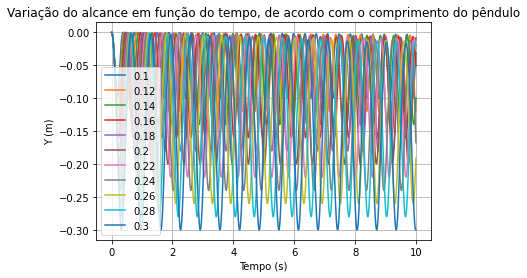

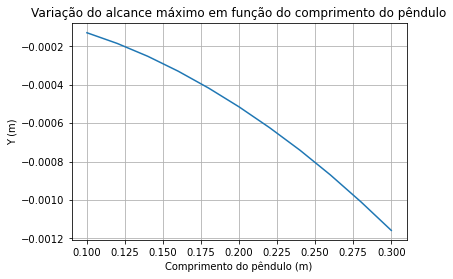

In [61]:
# Tempo que o pêndulo demora para parar em função do comprimento

def pendulo2(a, t, l0):
    x = a[0]
    y = a[1]
    vx = a[2]
    vy = a[3]
    v = sqrt(vx ** 2 + vy ** 2)
    if v > 0:
        cos_alpha = vx/v
        sen_alpha = vy/v
    else:
        sen_alpha = 0
        cos_alpha = 0
    sen_theta = x/l0
    cos_theta = -y/l0
    Fa = ρ * A * Cd * (v ** 2) * 0.5
    T = m*v**2/l0 + m*g*cos_theta
    dxdt = vx
    dydt = vy
    dvxdt = (-T * sen_theta - Fa * cos_alpha) / m
    dvydt = ( T * cos_theta - Fa * sen_alpha) / m - g
    dadt = [dxdt, dydt, dvxdt, dvydt]
    return dadt

comprimento_lista = [0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.30]
altura_max_lista = []

def calcula_altura(y_lista):
    for i in range(1,len(y_lista)):
        if (y_lista[i] > y_lista[i-1]) and (y_lista[i] > y_lista[i+1]):
            return y_lista[i]

for l0 in comprimento_lista:
    a_0 = [-l0, y_0, vx_0, vy_0]
    a_lista = odeint(pendulo2, a_0, t_lista, args = (l0,))
    y_lista = a_lista[:, 1]
    altura_max_lista.append(calcula_altura(y_lista))
    plt.plot(t_lista, a_lista[:, 1], label = l0)

plt.title("Variação do alcance em função do tempo, de acordo com o comprimento do pêndulo")
plt.xlabel("Tempo (s)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.legend()
plt.show()


plt.plot(comprimento_lista,altura_max_lista)
plt.title("Variação do alcance máximo em função do comprimento do pêndulo")
plt.xlabel("Comprimento do pêndulo (m)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.show()